# Data Profiling

In [52]:
# Import Libraries

# data manipulation and analysis
import pandas as pd

# multi-dimensional arrays and matrices
# mathematical functions
import numpy as np

# parsing & processing Python Source Code
# convert strings of Python code into executable code
import ast # Abstract Syntax Trees (AST) module

# data visualization
import matplotlib.pyplot as plt # creating static, animated, and interactive visualizations
import seaborn as sns # interface for drawing & statistical graphics
import mplcursors # interactive data cursors
import plotly.express as px

# database adapter for Python
import psycopg2 # allows interaction with PostgreSQL
import pandas as pd

# probability distributions and statistical functions
from scipy.stats import norm 
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [53]:
# Load Data
df_1 = pd.read_csv(r'C:\Users\ashwi\Documents\Data Analytics\Portfolio\IGN VIdeo Game Rarings\SQL\sql_cleaned_games.csv', index_col=False, delimiter=',')

In [54]:
df_1.head(1)

title  score score_phrase platform   genre  release_year  \
0  Checkered Flag   10.0  Masterpiece     Lynx  Racing          1999   

   release_month  release_day  
0              7            6

In [55]:
# Display Columns
df_1.columns

Index(['title', 'score', 'score_phrase', 'platform', 'genre', 'release_year',
       'release_month', 'release_day'],
      dtype='object')

In [56]:
# Dimension
df_1.shape

(18625, 8)

In [57]:
# Display Information
df_1.info

<bound method DataFrame.info of                                          title  score score_phrase  \
0                               Checkered Flag   10.0  Masterpiece   
1                               Chrono Trigger   10.0  Masterpiece   
2                           Dragon Warrior III   10.0  Masterpiece   
3                          Grand Theft Auto IV   10.0  Masterpiece   
4                          Grand Theft Auto IV   10.0  Masterpiece   
...                                        ...    ...          ...   
18620                 The Crow: City of Angels    1.0   Unbearable   
18621                   The Simpsons Wrestling    1.0   Unbearable   
18622                      Action Girlz Racing    0.8     Disaster   
18623                       Extreme PaintBrawl    0.7     Disaster   
18624  Looney Tunes: Back in Action: Zany Race    0.5     Disaster   

             platform              genre  release_year  release_month  \
0                Lynx             Racing          1999

In [58]:
# Display Summary Statistics
df_1.describe()

score  release_year  release_month   release_day
count  18625.000000  18625.000000    18625.00000  18625.000000
mean       6.950459   2006.515329        7.13847     15.603866
std        1.711736      4.587529        3.47671      8.690128
min        0.500000   1970.000000        1.00000      1.000000
25%        6.000000   2003.000000        4.00000      8.000000
50%        7.300000   2007.000000        8.00000     16.000000
75%        8.200000   2010.000000       10.00000     23.000000
max       10.000000   2016.000000       12.00000     31.000000

In [59]:
# summary statistics for columns with object data types
print(df_1.describe(include=['object']))

        title score_phrase platform   genre
count   18625        18625    18625   18589
unique  12589           11       59     112
top      Cars        Great       PC  Action
freq       10         4773     3370    3797


## Check for Missing Values

In [60]:
df_1.isnull().sum()

title             0
score             0
score_phrase      0
platform          0
genre            36
release_year      0
release_month     0
release_day       0
dtype: int64

genre contains 36 missing values

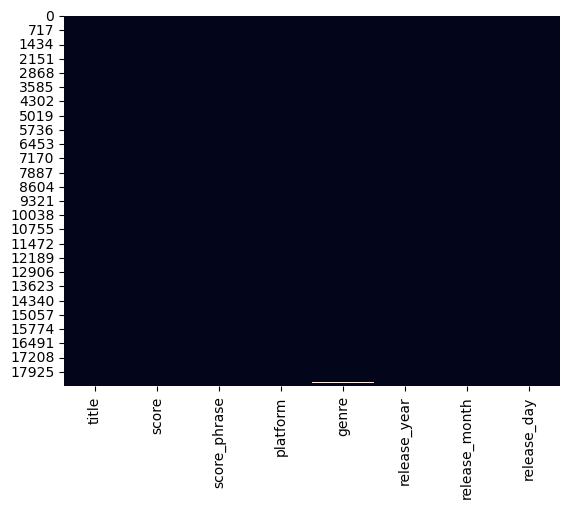

In [61]:
## Heat map viisual of missing values

sns.heatmap(df_1.isnull(), cbar=False)
plt.show()

Colour indicates column contains missing values

## Data Distribution

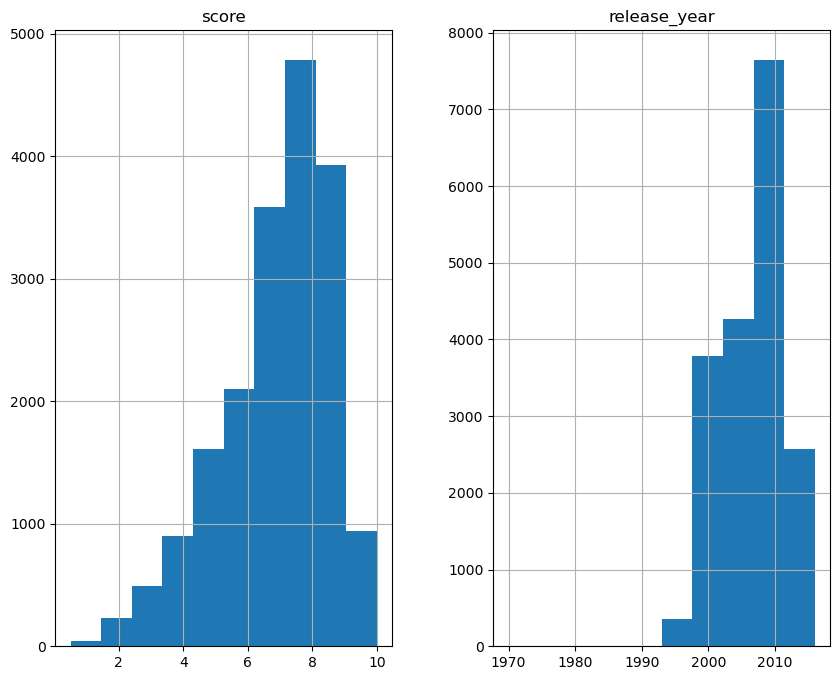

In [62]:
# Display histograms for each Data Frame column

selected_columns = ['score', 'release_year']
df_1[selected_columns].hist(figsize=(10,8))
plt.show()

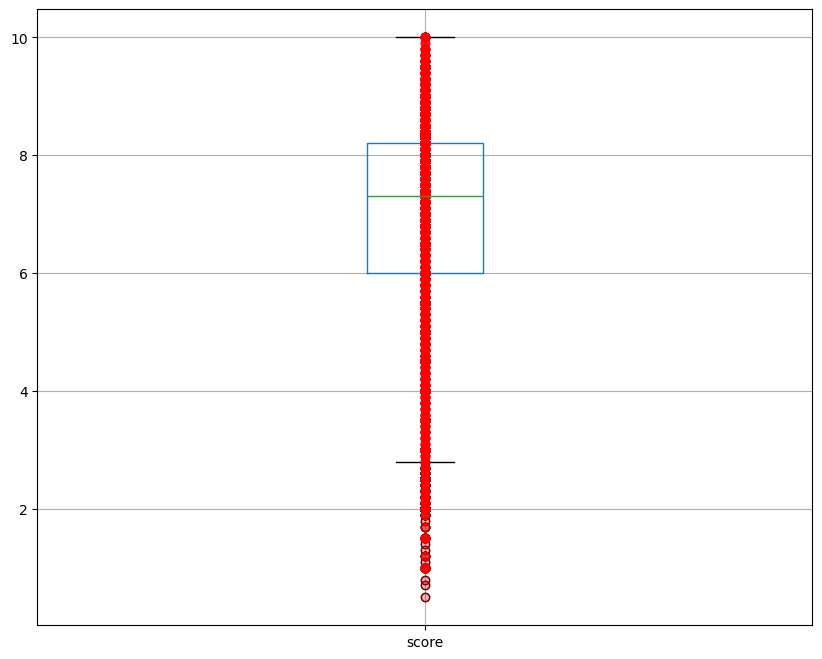

In [63]:
# Selected column
selected_columns = ['score']

# Create boxplot
boxplot = df_1[selected_columns].boxplot(figsize=(10,8), showfliers=True)

# Show data points on the graph
for i in range(len(selected_columns)):
    y = df_1[selected_columns[i]]
    x = [i + 1] * len(y)
    plt.plot(x, y, 'ro', alpha=0.3)  # 'ro' for red circles, alpha for transparency

plt.show()

## Data Relationships

C:\Users\ashwi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashwi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


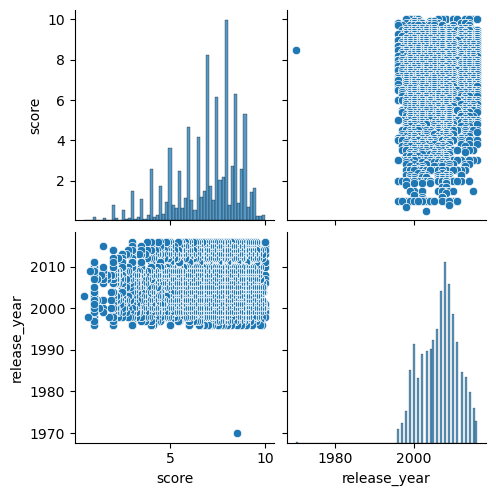

In [64]:
# Display relationship between 'score' and 'release_year'
df_subset = df_1[['score', 'release_year']]
                  
sns.pairplot(df_subset)
plt.show()

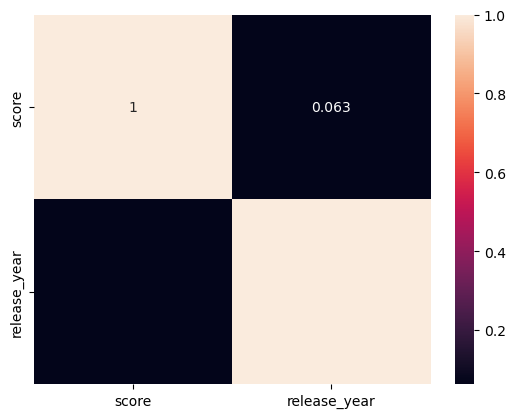

In [65]:
# Correlation heatmap matrix betewen 'score' and 'release year'
corr_subset = df_1[['score', 'release_year']]
corr_matrix = corr_subset.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Categorical Variables
- shows the counts of observations in each categorical bin using bars

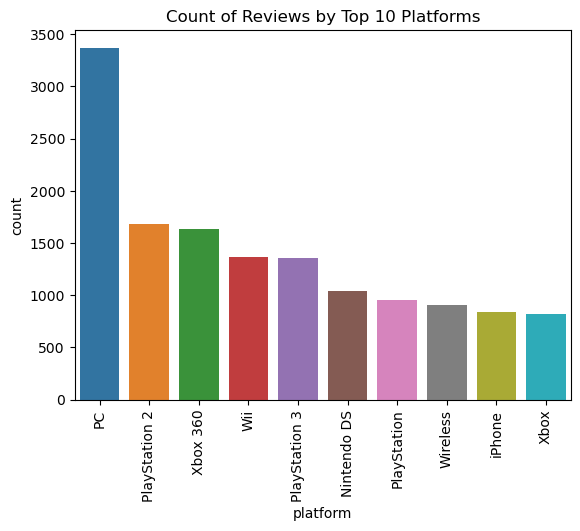

In [66]:
# Calculate counts for each platform
platform_counts = df_1['platform'].value_counts()

# Determine the top 10 platforms based on counts
top_10_platforms = platform_counts.head(10).index

# Filter the dataframe to include only the top 10 platforms
df_top_10_platforms = df_1[df_1['platform'].isin(top_10_platforms)]

# Create the count plot with ordered top 10 platforms
sns.countplot(x='platform', data=df_top_10_platforms, order=top_10_platforms)
plt.title('Count of Reviews by Top 10 Platforms')
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many platforms
plt.show()

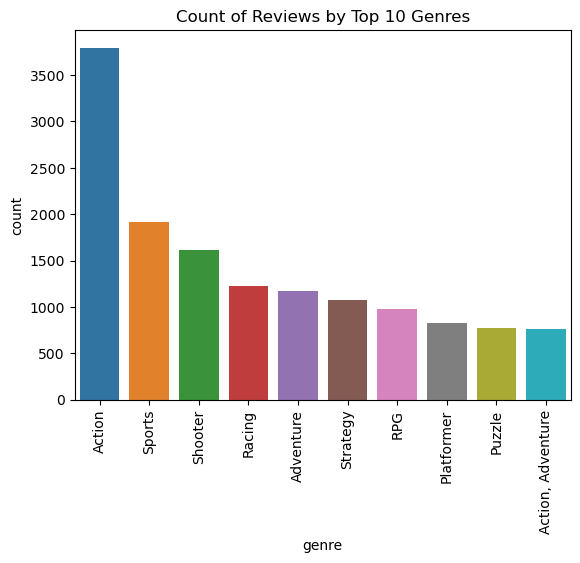

In [67]:
# Calculate counts for each genre
genre_counts = df_1['genre'].value_counts()

# Determine the top 10 genres based on counts
top_10_genres = genre_counts.head(10).index

# Filter the dataframe to include only the top 10 genres
df_top_10_genres = df_1[df_1['genre'].isin(top_10_genres)]

# Create the count plot with ordered top 10 genres
sns.countplot(x='genre', data=df_top_10_genres, order=top_10_genres)
plt.title('Count of Reviews by Top 10 Genres')
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many genres
plt.show()

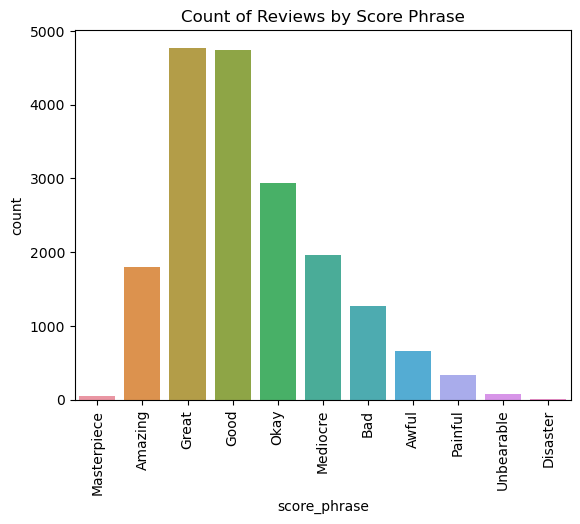

In [68]:
# Countplot for score_phrase
# Calculate counts for each score phrase
score_phrase_counts = df_1['score_phrase'].value_counts()

# Create the count plot without specifying order
sns.countplot(x='score_phrase', data=df_1)
plt.title('Count of Reviews by Score Phrase')
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.show()

## Duplicates

In [69]:
# count duplicate values
df_1.duplicated().sum()

48

In [70]:
# Display duplicate values
df_1[df_1.duplicated(keep=False)]

title  score score_phrase  \
173    Call of Duty: Modern Warfare 2 (Hardened Edition)    9.5      Amazing   
174    Call of Duty: Modern Warfare 2 (Hardened Edition)    9.5      Amazing   
1662                                        Steel Talons    9.0      Amazing   
1663                                        Steel Talons    9.0      Amazing   
1835                                          WipEout XL    9.0      Amazing   
...                                                  ...    ...          ...   
18109                                      Raven Project    3.0        Awful   
18355                                  Big League Sports    2.3      Painful   
18356                                  Big League Sports    2.3      Painful   
18616                                       Revolution X    1.0   Unbearable   
18617                                       Revolution X    1.0   Unbearable   

            platform                genre  release_year  release_month  \
173    PlayStation 3              Shooter          2009             11   
174    PlayStation 3              Shooter          2009             11   
1662            Lynx       Flight, Action          1999              7   
1663            Lynx       Flight, Action          1999              7   
1835     PlayStation               Racing          1996             11   
...              ...                  ...           ...            ...   
18109    PlayStation               Action          1996             11   
18355            Wii  Sports, Compilation          2008             11   
18356            Wii  Sports, Compilation          2008             11   
18616    PlayStation               Action          1996             11   
18617    PlayStation               Action          1996             11   

       release_day  
173             10  
174             10  
1662             6  
1663             6  
1835            26  
...            ...  
18109           25  
18355           25  
18356           25  
18616           25  
18617           25  

[96 rows x 8 columns]

In [71]:
df_1[df_1['title'].duplicated(keep=False)]

title  score score_phrase  \
1                             Chrono Trigger   10.0  Masterpiece   
3                        Grand Theft Auto IV   10.0  Masterpiece   
4                        Grand Theft Auto IV   10.0  Masterpiece   
5      Grand Theft Auto IV (Special Edition)   10.0  Masterpiece   
6      Grand Theft Auto IV (Special Edition)   10.0  Masterpiece   
...                                      ...    ...          ...   
18609                             Mega Man 2    1.0   Unbearable   
18612                        NFL Blitz 20-03    1.0   Unbearable   
18615           PDC World Championship Darts    1.0   Unbearable   
18616                           Revolution X    1.0   Unbearable   
18617                           Revolution X    1.0   Unbearable   

               platform              genre  release_year  release_month  \
1                   Wii        Action, RPG          2011              5   
3              Xbox 360  Action, Adventure          2008              4   
4         PlayStation 3  Action, Adventure          2008              4   
5              Xbox 360             Action          2008              4   
6         PlayStation 3             Action          2008              4   
...                 ...                ...           ...            ...   
18609            iPhone             Action          2009              3   
18612  Game Boy Advance     Sports, Action          2002              8   
18615     PlayStation 2             Sports          2009              7   
18616       PlayStation             Action          1996             11   
18617       PlayStation             Action          1996             11   

       release_day  
1               25  
3               25  
4               25  
5               29  
6               29  
...            ...  
18609           27  
18612           13  
18615           17  
18616           25  
18617           25  

[9371 rows x 8 columns]

## Genre Column

In [72]:
# Display Genre
df_1

title  score score_phrase  \
0                               Checkered Flag   10.0  Masterpiece   
1                               Chrono Trigger   10.0  Masterpiece   
2                           Dragon Warrior III   10.0  Masterpiece   
3                          Grand Theft Auto IV   10.0  Masterpiece   
4                          Grand Theft Auto IV   10.0  Masterpiece   
...                                        ...    ...          ...   
18620                 The Crow: City of Angels    1.0   Unbearable   
18621                   The Simpsons Wrestling    1.0   Unbearable   
18622                      Action Girlz Racing    0.8     Disaster   
18623                       Extreme PaintBrawl    0.7     Disaster   
18624  Looney Tunes: Back in Action: Zany Race    0.5     Disaster   

             platform              genre  release_year  release_month  \
0                Lynx             Racing          1999              7   
1                 Wii        Action, RPG          2011              5   
2      Game Boy Color                RPG          2001              7   
3            Xbox 360  Action, Adventure          2008              4   
4       PlayStation 3  Action, Adventure          2008              4   
...               ...                ...           ...            ...   
18620     PlayStation             Action          1997              3   
18621     PlayStation             Action          2001              4   
18622             Wii             Racing          2009              2   
18623              PC             Action          1998             10   
18624        Wireless             Racing          2003             10   

       release_day  
0                6  
1               25  
2               20  
3               25  
4               25  
...            ...  
18620           11  
18621            6  
18622           11  
18623           29  
18624           28  

[18625 rows x 8 columns]

Contains Multiple Values

In [73]:
# Save df_1 to a CSV file
df_1.to_csv('df_1.csv', sep=',', index=False)